# 1.Importing all required Packages

In [93]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
from tensorflow.keras.models import load_model

# 2.Deleting Unwanted Images

In [94]:
data_dir='data'

In [95]:
image_exts=['jpeg','jpg','bmp','png']

In [96]:
os.listdir(data_dir)

['happy', 'sad']

In [97]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

# 3.Loading Data

In [98]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 297 files belonging to 2 classes.


In [99]:
data_iterator=data.as_numpy_iterator()

In [100]:
batch=data_iterator.next()

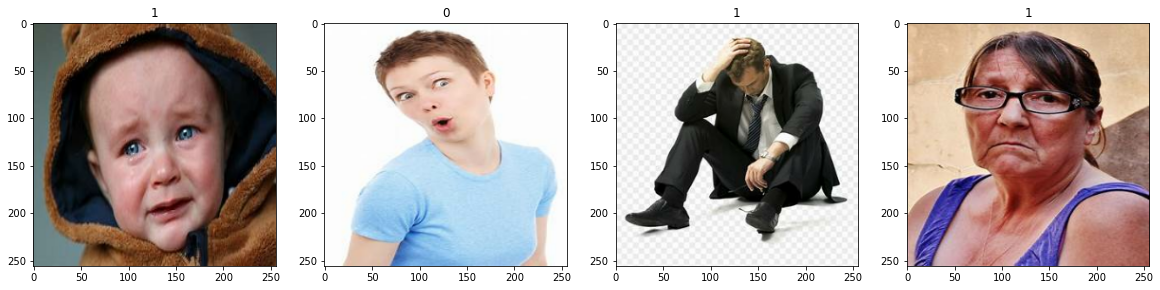

In [101]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4.Scaling Data

In [102]:
data=data.map(lambda x,y:(x/255,y))

# 5.Splitting Data

In [103]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [104]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

# 6.Building Deep Learning Model

In [105]:
model=Sequential()

In [106]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [107]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [108]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# 7.Training

In [109]:
logdir='logs'

In [110]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [111]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 8s 1s/step - loss: 1.1113 - accuracy: 0.5223 - val_loss: 0.6787 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 7s 998ms/step - loss: 0.6794 - accuracy: 0.5536 - val_loss: 0.6741 - val_accuracy: 0.5156
Epoch 3/20
7/7 [==============================] - 7s 1s/step - loss: 0.6536 - accuracy: 0.5893 - val_loss: 0.6966 - val_accuracy: 0.5469
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.6820 - accuracy: 0.6518 - val_loss: 0.6506 - val_accuracy: 0.5625
Epoch 5/20
7/7 [==============================] - 7s 1s/step - loss: 0.6403 - accuracy: 0.6339 - val_loss: 0.6242 - val_accuracy: 0.7188
Epoch 6/20
7/7 [==============================] - 7s 1s/step - loss: 0.6355 - accuracy: 0.6116 - val_loss: 0.6471 - val_accuracy: 0.6094
Epoch 7/20
7/7 [==============================] - 7s 1s/step - loss: 0.6420 - accuracy: 0.6161 - val_loss: 0.6274 - val_accuracy: 0.7031
Epoch 8/20
7/7 [======================

# 8.Plotting Performane

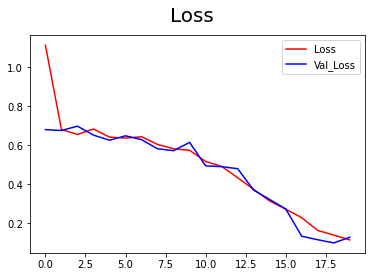

In [112]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='red',label='Loss')
plt.plot(hist.history['val_loss'],color='blue',label='Val_Loss')
fig.suptitle("Loss",fontsize=20)
plt.legend()
plt.show()

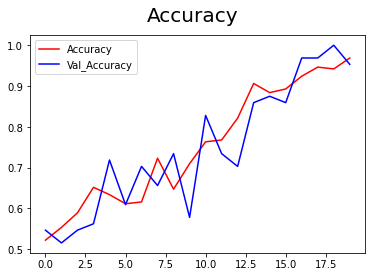

In [113]:
fig2=plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='blue',label='Val_Accuracy')
fig2.suptitle("Accuracy",fontsize=20)
plt.legend()
plt.show()

# 9.Evaluation

In [114]:
pre=Precision()
re=Recall()
ba=BinaryAccuracy()

In [115]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    ba.update_state(y,yhat)

1/1 [==============================] - 0s 123ms/step


In [116]:
print('Precision:',pre.result().numpy())
print('Recall:',re.result().numpy())
print('Accuracy:',ba.result().numpy())

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


# 10.Testing

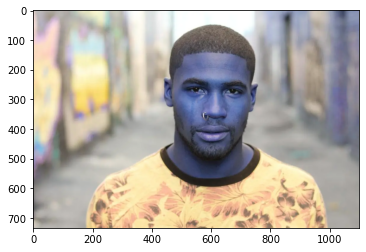

In [117]:
img=cv2.imread("sad.jpg")
plt.imshow(img)
plt.show()

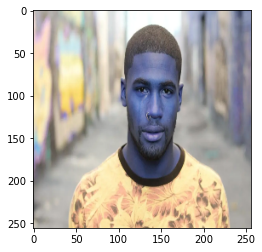

In [118]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [119]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 32ms/step


In [120]:
yhat

array([[0.9180036]], dtype=float32)

In [121]:
if yhat<0.5:
    print("Predicted Class is happy")
else:
    print("Predicted Class is Sad")

Predicted Class is Sad


# 11.Saving Model

In [122]:
model.save('imageclassifier.h5')

In [123]:
new_model=load_model('imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 82ms/step


array([[0.9180036]], dtype=float32)